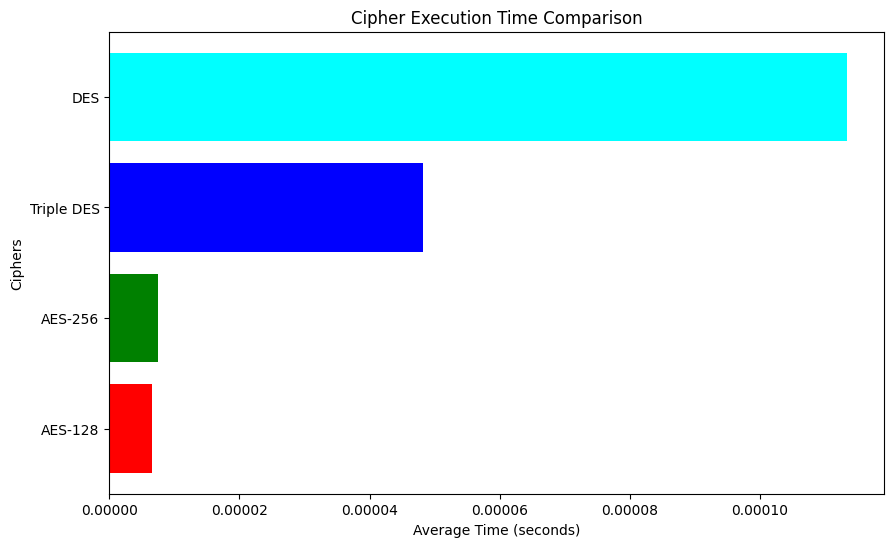

In [2]:
import time
import matplotlib.pyplot as plt
from Crypto.Cipher import DES, DES3, AES
from Crypto.Random import get_random_bytes
from operator import itemgetter

def encrypt_with_timer(cipher, plaintext):
    start_time = time.time()
    cipher.encrypt(plaintext)
    end_time = time.time()
    return end_time - start_time

def get_average_timing(cipher, plaintext, iterations=10):
    total_time = 0
    for _ in range(iterations):
        total_time += encrypt_with_timer(cipher, plaintext)
    return total_time / iterations

def main():
    plaintext = b'A' * 1000
    results = []

    # DES
    key_des = get_random_bytes(8)
    cipher = DES.new(key_des, DES.MODE_ECB)
    padded_text = plaintext + b' ' * (8 - len(plaintext) % 8)
    des_time = get_average_timing(cipher, padded_text)
    results.append({
        'Cipher Name': 'DES',
        'Input Size (bits)': len(plaintext) * 8,
        'Output Size (bits)': len(padded_text) * 8,
        'Total Time': des_time
    })

    # Triple DES
    key_3des = get_random_bytes(16)
    cipher = DES3.new(key_3des, DES3.MODE_ECB)
    padded_text = plaintext + b' ' * (8 - len(plaintext) % 8)
    triple_des_time = get_average_timing(cipher, padded_text)
    results.append({
        'Cipher Name': 'Triple DES',
        'Input Size (bits)': len(plaintext) * 8,
        'Output Size (bits)': len(padded_text) * 8,
        'Total Time': triple_des_time
    })

    # AES-128
    key_aes128 = get_random_bytes(16)
    cipher = AES.new(key_aes128, AES.MODE_ECB)
    padded_text = plaintext + b' ' * (16 - len(plaintext) % 16)
    aes128_time = get_average_timing(cipher, padded_text)
    results.append({
        'Cipher Name': 'AES-128',
        'Input Size (bits)': len(plaintext) * 8,
        'Output Size (bits)': len(padded_text) * 8,
        'Total Time': aes128_time
    })

    # AES-256
    key_aes256 = get_random_bytes(32)
    cipher = AES.new(key_aes256, AES.MODE_ECB)
    padded_text = plaintext + b' ' * (16 - len(plaintext) % 16)
    aes256_time = get_average_timing(cipher, padded_text)
    results.append({
        'Cipher Name': 'AES-256',
        'Input Size (bits)': len(plaintext) * 8,
        'Output Size (bits)': len(padded_text) * 8,
        'Total Time': aes256_time
    })

    results = sorted(results, key=itemgetter('Total Time'))

    # Plotting
    cipher_names = [res['Cipher Name'] for res in results]
    timings = [res['Total Time'] for res in results]

    plt.figure(figsize=(10, 6))
    plt.barh(cipher_names, timings, color=['red', 'green', 'blue', 'cyan'])
    plt.xlabel('Average Time (seconds)')
    plt.ylabel('Ciphers')
    plt.title('Cipher Execution Time Comparison')
    plt.show()

if __name__ == '__main__':
    main()
